<a href="https://colab.research.google.com/github/Jamaleldin/MRNET-for-Knee-Diagnosis/blob/Model_VGG/Vgg_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **All needed library imports**

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16
import tensorflow as tf
from tensorflow import keras

# **Importing the notebook**

In [0]:
# getting the notebook path
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [0]:
!pip install import-ipynb

In [0]:
import import_ipynb
import MRNet_models_processing as processing

importing Jupyter notebook from MRNet_models_processing.ipynb
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Using TensorFlow backend.


unzip:  cannot find or open /content/drive/My Drive/MRNET data set/MRNet-v1.0.zip, /content/drive/My Drive/MRNET data set/MRNet-v1.0.zip.zip or /content/drive/My Drive/MRNET data set/MRNet-v1.0.zip.ZIP.


# **Initializing the feature extractor used**

In [0]:
# the extractor uses transfer learning using the weights of imageNet
extractor = VGG16(weights='imagenet',input_shape=(256,256,3),include_top=False);
extractor.compile(loss='binary_crossentropy',optimizer = keras.optimizers.Adam(1e-4) ,metrics=['acc']);

In [0]:
extractor.summary();

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

# **Creating the binary classifier model**

In [0]:
# used as a starting point to study the outcomes
def binary_classifier():  
  binary_class = keras.models.Sequential();
  binary_class.add(keras.layers.Dense(units=128 , activation = 'relu' , input_dim = 512,kernel_regularizer=keras.regularizers.l2(0.001) ));
  binary_class.add(keras.layers.Dropout(0.5));
  binary_class.add(keras.layers.Dense(units=64 , activation = 'relu',kernel_regularizer=keras.regularizers.l2(0.001)));
  binary_class.add(keras.layers.Dropout(0.5));
  binary_class.add(keras.layers.Dense(units=1 , activation = 'sigmoid'));
  binary_class.compile(loss='binary_crossentropy',optimizer = keras.optimizers.Adam(lr=1e-4),metrics=['acc']);
  return binary_class;

In [0]:
binary_classifier().summary();

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 73,985
Trainable params: 73,985
Non-trainable params: 0
_________________________________________________________________


# **Training the classifiers**

## **Axial-abnormal**

Epoch 1/50
40/51 [======================>.......] - ETA: 0s - loss: 7.4865 - acc: 0.5800
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Classifier/axial_abnormal.h5
51/51 [==============================] - 1s 15ms/step - loss: 6.7291 - acc: 0.6116 - val_loss: 3.3096 - val_acc: 0.8053
Epoch 2/50
36/51 [====================>.........] - ETA: 0s - loss: 3.7366 - acc: 0.6986
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 3ms/step - loss: 3.5326 - acc: 0.6824 - val_loss: 1.8417 - val_acc: 0.8053
Epoch 3/50
41/51 [=======================>......] - ETA: 0s - loss: 2.1858 - acc: 0.7110
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 3ms/step - loss: 2.1644 - acc: 0.7129 - val_loss: 1.2210 - val_acc: 0.8053
Epoch 4/50
50/51 [============================>.] - ETA: 0s - loss: 1.7438 - acc: 0.7000
Epoch 00004: val_acc improved from

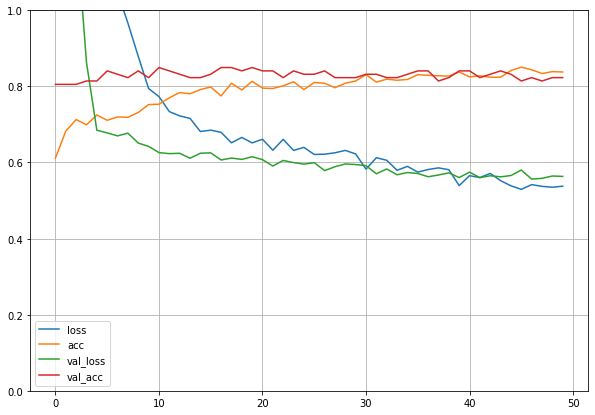

In [0]:
processing.train_classifier(extractor,binary_classifier(),processing.vgg_transfer,processing.axial,processing.abnormal);

In [0]:
processing.test_classifier(extractor,processing.load_model(processing.vgg_transfer,processing.axial,processing.abnormal,processing.classifier),processing.axial,processing.abnormal);

4/4 [==============================] - 0s 3ms/step - loss: 0.6724 - acc: 0.8333


## **Axial-acl**

Epoch 1/50
41/51 [=======================>......] - ETA: 0s - loss: 5.0344 - acc: 0.6476
Epoch 00001: val_acc improved from -inf to 0.84956, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Classifier/axial_acl.h5
51/51 [==============================] - 0s 5ms/step - loss: 4.7692 - acc: 0.6598 - val_loss: 1.4347 - val_acc: 0.8496
Epoch 2/50
42/51 [=======================>......] - ETA: 0s - loss: 2.8075 - acc: 0.7202
Epoch 00002: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 3ms/step - loss: 2.7505 - acc: 0.7158 - val_loss: 1.0356 - val_acc: 0.8496
Epoch 3/50
38/51 [=====================>........] - ETA: 0s - loss: 2.1976 - acc: 0.6789
Epoch 00003: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 3ms/step - loss: 2.0348 - acc: 0.6942 - val_loss: 0.8227 - val_acc: 0.8496
Epoch 4/50
37/51 [====================>.........] - ETA: 0s - loss: 1.7428 - acc: 0.6838
Epoch 00004: val_acc did not improve fro

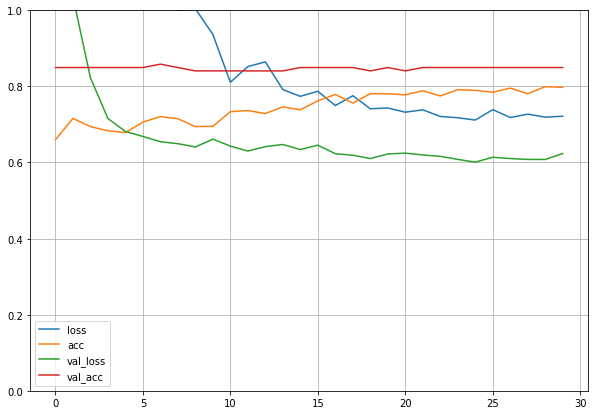

In [0]:
processing.train_classifier(extractor,binary_classifier(),processing.vgg_transfer,processing.axial,processing.acl);

In [0]:
processing.test_classifier(extractor,processing.load_model(processing.vgg_transfer,processing.axial,processing.acl,processing.classifier),processing.axial,processing.acl);

4/4 [==============================] - 0s 3ms/step - loss: 1.1217 - acc: 0.5500


## **Axial-meniscal**

Epoch 1/50
41/51 [=======================>......] - ETA: 0s - loss: 4.0173 - acc: 0.5341
Epoch 00001: val_acc improved from -inf to 0.66372, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Classifier/axial_meniscus.h5
51/51 [==============================] - 0s 6ms/step - loss: 3.6888 - acc: 0.5536 - val_loss: 1.3825 - val_acc: 0.6637
Epoch 2/50
33/51 [==================>...........] - ETA: 0s - loss: 2.3685 - acc: 0.5576
Epoch 00002: val_acc did not improve from 0.66372
51/51 [==============================] - 0s 4ms/step - loss: 2.3447 - acc: 0.5447 - val_loss: 1.0635 - val_acc: 0.6460
Epoch 3/50
45/51 [=========================>....] - ETA: 0s - loss: 1.6452 - acc: 0.5900
Epoch 00003: val_acc did not improve from 0.66372
51/51 [==============================] - 0s 3ms/step - loss: 1.6473 - acc: 0.5831 - val_loss: 0.9258 - val_acc: 0.6283
Epoch 4/50
43/51 [========================>.....] - ETA: 0s - loss: 1.3730 - acc: 0.5605
Epoch 00004: val_acc did not improv

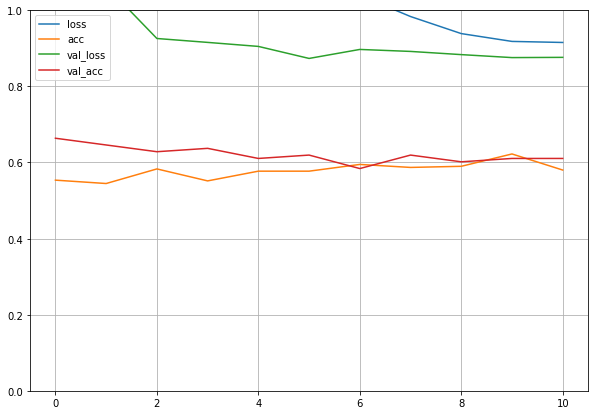

In [0]:
processing.train_classifier(extractor,binary_classifier(),processing.vgg_transfer,processing.axial,processing.meniscal);

In [0]:
processing.test_classifier(extractor,processing.load_model(processing.vgg_transfer,processing.axial,processing.meniscal,processing.classifier),processing.axial,processing.meniscal);

4/4 [==============================] - 0s 3ms/step - loss: 1.6378 - acc: 0.5583


## **sagittal-abnormal**

Epoch 1/50
38/51 [=====================>........] - ETA: 0s - loss: 4.3935 - acc: 0.6303
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Classifier/sagittal_abnormal.h5
51/51 [==============================] - 0s 6ms/step - loss: 3.9917 - acc: 0.6421 - val_loss: 1.8370 - val_acc: 0.8053
Epoch 2/50
47/51 [==========================>...] - ETA: 0s - loss: 2.3538 - acc: 0.7064
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 4ms/step - loss: 2.3147 - acc: 0.7080 - val_loss: 1.1872 - val_acc: 0.8053
Epoch 3/50
49/51 [===========================>..] - ETA: 0s - loss: 1.8253 - acc: 0.6939
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 4ms/step - loss: 1.8599 - acc: 0.6912 - val_loss: 0.8135 - val_acc: 0.7876
Epoch 4/50
50/51 [============================>.] - ETA: 0s - loss: 1.3619 - acc: 0.7070
Epoch 00004: val_acc did not imp

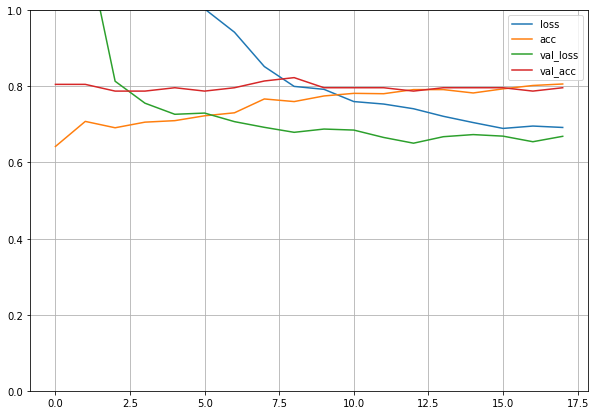

In [0]:
processing.train_classifier(extractor,binary_classifier(),processing.vgg_transfer,processing.sagittal,processing.abnormal);

In [0]:
processing.test_classifier(extractor,processing.load_model(processing.vgg_transfer,processing.sagittal,processing.abnormal,processing.classifier),processing.sagittal,processing.abnormal);

4/4 [==============================] - 0s 3ms/step - loss: 0.6719 - acc: 0.8333


## **sagittal-acl**

Epoch 1/50
42/51 [=======================>......] - ETA: 0s - loss: 4.9889 - acc: 0.6238
Epoch 00001: val_acc improved from -inf to 0.84956, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Classifier/sagittal_acl.h5
51/51 [==============================] - 0s 6ms/step - loss: 4.5259 - acc: 0.6559 - val_loss: 2.1387 - val_acc: 0.8496
Epoch 2/50
34/51 [===================>..........] - ETA: 0s - loss: 2.7348 - acc: 0.7206
Epoch 00002: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 4ms/step - loss: 2.6597 - acc: 0.7198 - val_loss: 1.3561 - val_acc: 0.8496
Epoch 3/50
42/51 [=======================>......] - ETA: 0s - loss: 2.2228 - acc: 0.6810
Epoch 00003: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 3ms/step - loss: 2.1948 - acc: 0.6775 - val_loss: 0.9602 - val_acc: 0.8230
Epoch 4/50
40/51 [======================>.......] - ETA: 0s - loss: 1.4716 - acc: 0.7300
Epoch 00004: val_acc did not improve 

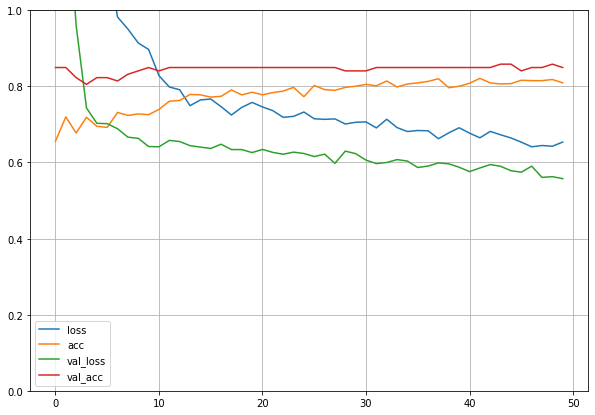

In [0]:
processing.train_classifier(extractor,binary_classifier(),processing.vgg_transfer,processing.sagittal,processing.acl);

In [0]:
processing.test_classifier(extractor,processing.load_model(processing.vgg_transfer,processing.sagittal,processing.acl,processing.classifier),processing.sagittal,processing.acl);

4/4 [==============================] - 0s 3ms/step - loss: 0.8390 - acc: 0.6083


## **sagittal-meniscal**

Epoch 1/50
50/51 [============================>.] - ETA: 0s - loss: 4.0310 - acc: 0.5340
Epoch 00001: val_acc improved from -inf to 0.66372, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Classifier/sagittal_meniscus.h5
51/51 [==============================] - 0s 6ms/step - loss: 4.0154 - acc: 0.5339 - val_loss: 1.7482 - val_acc: 0.6637
Epoch 2/50
48/51 [===========================>..] - ETA: 0s - loss: 2.7041 - acc: 0.5594
Epoch 00002: val_acc did not improve from 0.66372
51/51 [==============================] - 0s 4ms/step - loss: 2.6662 - acc: 0.5624 - val_loss: 1.0745 - val_acc: 0.6637
Epoch 3/50
48/51 [===========================>..] - ETA: 0s - loss: 1.8604 - acc: 0.5677
Epoch 00003: val_acc improved from 0.66372 to 0.68142, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Classifier/sagittal_meniscus.h5
51/51 [==============================] - 0s 5ms/step - loss: 1.8486 - acc: 0.5683 - val_loss: 0.9187 - val_acc: 0.6814
Epoch 4/50
49

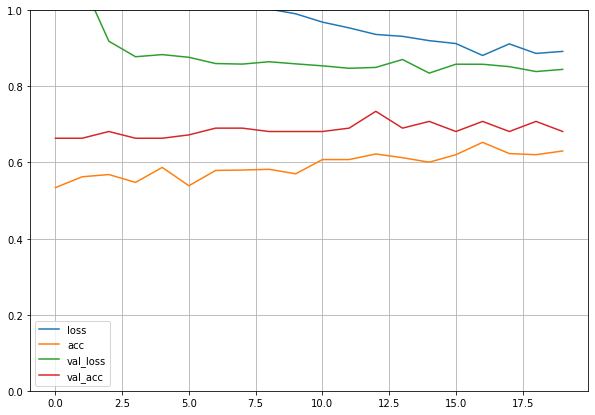

In [0]:
processing.train_classifier(extractor,binary_classifier(),processing.vgg_transfer,processing.sagittal,processing.meniscal);

In [0]:
processing.test_classifier(extractor,processing.load_model(processing.vgg_transfer,processing.sagittal,processing.meniscal,processing.classifier),processing.sagittal,processing.meniscal);

4/4 [==============================] - 0s 2ms/step - loss: 0.8804 - acc: 0.6000


## **coronal-abnormal**

Epoch 1/50
50/51 [============================>.] - ETA: 0s - loss: 4.1477 - acc: 0.6330
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Classifier/coronal_abnormal.h5
51/51 [==============================] - 0s 7ms/step - loss: 4.1277 - acc: 0.6323 - val_loss: 2.0740 - val_acc: 0.8053
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 2.2486 - acc: 0.6814
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 4ms/step - loss: 2.2486 - acc: 0.6814 - val_loss: 1.2529 - val_acc: 0.8053
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 1.7211 - acc: 0.6932
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 4ms/step - loss: 1.7211 - acc: 0.6932 - val_loss: 0.8460 - val_acc: 0.8053
Epoch 4/50
51/51 [==============================] - ETA: 0s - loss: 1.1795 - acc: 0.7237
Epoch 00004: val_acc improved fro

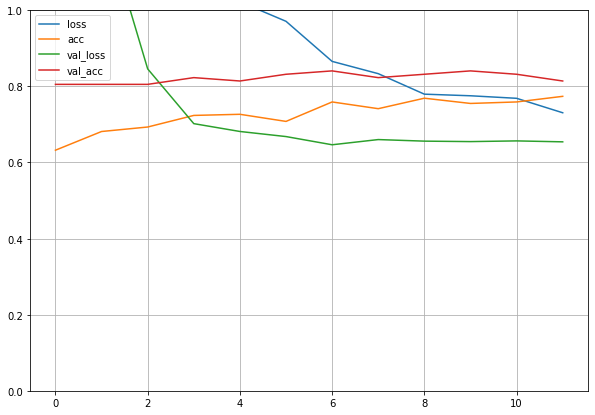

In [0]:
processing.train_classifier(extractor,binary_classifier(),processing.vgg_transfer,processing.coronal,processing.abnormal);

In [0]:
processing.test_classifier(extractor,processing.load_model(processing.vgg_transfer,processing.coronal,processing.abnormal,processing.classifier),processing.coronal,processing.abnormal);

4/4 [==============================] - 0s 3ms/step - loss: 0.7160 - acc: 0.7917


## **coronal-acl**

Epoch 1/50
38/51 [=====================>........] - ETA: 0s - loss: 2.5735 - acc: 0.6513
Epoch 00001: val_acc improved from -inf to 0.84956, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Classifier/coronal_acl.h5
51/51 [==============================] - 0s 6ms/step - loss: 2.4338 - acc: 0.6608 - val_loss: 0.9230 - val_acc: 0.8496
Epoch 2/50
36/51 [====================>.........] - ETA: 0s - loss: 1.8587 - acc: 0.7014
Epoch 00002: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 3ms/step - loss: 1.7773 - acc: 0.6853 - val_loss: 0.6754 - val_acc: 0.8496
Epoch 3/50
41/51 [=======================>......] - ETA: 0s - loss: 1.3076 - acc: 0.6976
Epoch 00003: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 3ms/step - loss: 1.2703 - acc: 0.7011 - val_loss: 0.6682 - val_acc: 0.8496
Epoch 4/50
40/51 [======================>.......] - ETA: 0s - loss: 1.0766 - acc: 0.7013
Epoch 00004: val_acc did not improve f

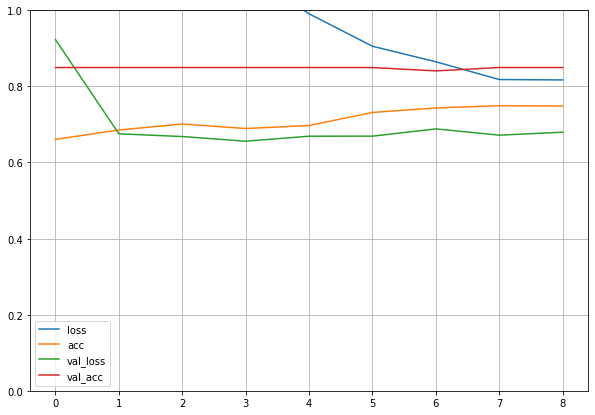

In [0]:
processing.train_classifier(extractor,binary_classifier(),processing.vgg_transfer,processing.coronal,processing.acl);

In [0]:
processing.test_classifier(extractor,processing.load_model(processing.vgg_transfer,processing.coronal,processing.acl,processing.classifier),processing.coronal,processing.acl);

4/4 [==============================] - 0s 2ms/step - loss: 2.4784 - acc: 0.5500


## **coronal-meniscal**

Epoch 1/50
43/51 [========================>.....] - ETA: 0s - loss: 6.4544 - acc: 0.5035
Epoch 00001: val_acc improved from -inf to 0.66372, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Classifier/coronal_meniscus.h5
51/51 [==============================] - 1s 12ms/step - loss: 6.1285 - acc: 0.5074 - val_loss: 2.5107 - val_acc: 0.6637
Epoch 2/50
39/51 [=====================>........] - ETA: 0s - loss: 3.7808 - acc: 0.5231
Epoch 00002: val_acc did not improve from 0.66372
51/51 [==============================] - 0s 3ms/step - loss: 3.6440 - acc: 0.5192 - val_loss: 1.6856 - val_acc: 0.6637
Epoch 3/50
43/51 [========================>.....] - ETA: 0s - loss: 2.2919 - acc: 0.5558
Epoch 00003: val_acc did not improve from 0.66372
51/51 [==============================] - 0s 3ms/step - loss: 2.2654 - acc: 0.5575 - val_loss: 1.2819 - val_acc: 0.6637
Epoch 4/50
41/51 [=======================>......] - ETA: 0s - loss: 1.5974 - acc: 0.5622
Epoch 00004: val_acc did not imp

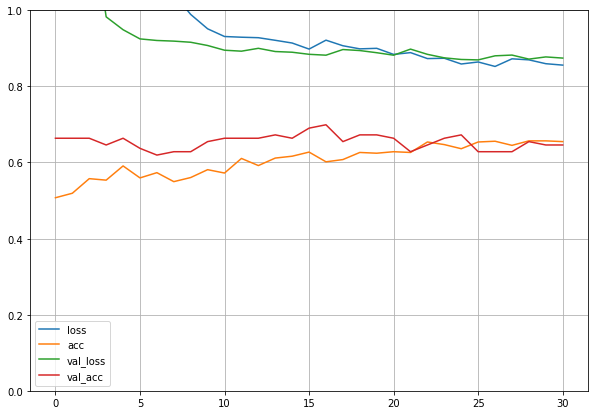

In [0]:
processing.train_classifier(extractor,binary_classifier(),processing.vgg_transfer,processing.coronal,processing.meniscal);

In [0]:
processing.test_classifier(extractor,processing.load_model(processing.vgg_transfer,processing.coronal,processing.meniscal,processing.classifier),processing.coronal,processing.meniscal);

4/4 [==============================] - 0s 2ms/step - loss: 0.9140 - acc: 0.5750


# **Using another classifier format**

In [0]:
# More parameters
def binary_classifier():  
  binary_class = keras.models.Sequential()
  binary_class.add(keras.layers.Dense(units=1024 , activation = 'relu' , input_dim = 512 ))
  binary_class.add(keras.layers.Dense(units=512 , activation = 'relu' ))
  binary_class.add(keras.layers.Dense(units=1 , activation = 'sigmoid'))
  binary_class.compile(loss='binary_crossentropy',optimizer = keras.optimizers.Adam(1e-4),metrics=['acc'])
  return binary_class

In [0]:
binary_classifier().summary();

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              525312    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 1,050,625
Trainable params: 1,050,625
Non-trainable params: 0
_________________________________________________________________


## **Axial-abnormal**

Epoch 1/50
37/51 [====================>.........] - ETA: 0s - loss: 0.6740 - acc: 0.7959
Epoch 00001: val_acc improved from -inf to 0.65487, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Classifier/axial_abnormal.h5
51/51 [==============================] - 1s 17ms/step - loss: 0.6124 - acc: 0.7994 - val_loss: 0.6641 - val_acc: 0.6549
Epoch 2/50
37/51 [====================>.........] - ETA: 0s - loss: 0.3604 - acc: 0.8459
Epoch 00002: val_acc improved from 0.65487 to 0.76991, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Classifier/axial_abnormal.h5
51/51 [==============================] - 0s 8ms/step - loss: 0.3736 - acc: 0.8328 - val_loss: 0.4046 - val_acc: 0.7699
Epoch 3/50
35/51 [===================>..........] - ETA: 0s - loss: 0.3168 - acc: 0.8514
Epoch 00003: val_acc improved from 0.76991 to 0.77876, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Classifier/axial_abnormal.h5
51/51 [=========================

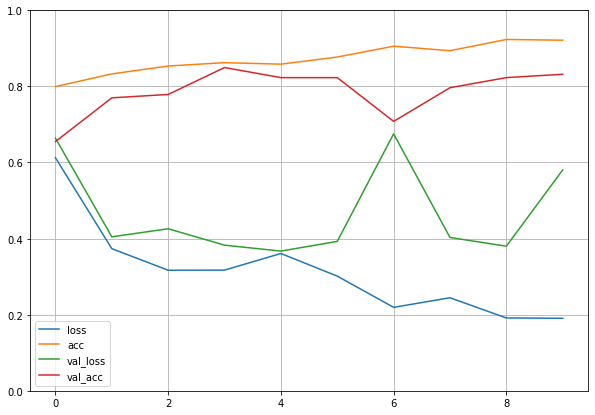

In [0]:
processing.train_classifier(extractor,binary_classifier(),processing.vgg_transfer,processing.axial,processing.abnormal);

In [0]:
processing.test_classifier(extractor,processing.load_model(processing.vgg_transfer,processing.axial,processing.abnormal,processing.classifier),processing.axial,processing.abnormal);

4/4 [==============================] - 0s 3ms/step - loss: 0.5541 - acc: 0.8167


## **Axial-acl**

Epoch 1/50
41/51 [=======================>......] - ETA: 0s - loss: 0.8630 - acc: 0.7402
Epoch 00001: val_acc improved from -inf to 0.84956, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Classifier/axial_acl.h5
51/51 [==============================] - 1s 20ms/step - loss: 0.7970 - acc: 0.7483 - val_loss: 0.4438 - val_acc: 0.8496
Epoch 2/50
39/51 [=====================>........] - ETA: 0s - loss: 0.4821 - acc: 0.8141
Epoch 00002: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 3ms/step - loss: 0.4824 - acc: 0.8181 - val_loss: 0.4499 - val_acc: 0.8053
Epoch 3/50
43/51 [========================>.....] - ETA: 0s - loss: 0.3495 - acc: 0.8593
Epoch 00003: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 3ms/step - loss: 0.3683 - acc: 0.8574 - val_loss: 0.5376 - val_acc: 0.7434
Epoch 4/50
45/51 [=========================>....] - ETA: 0s - loss: 0.4903 - acc: 0.8133
Epoch 00004: val_acc did not improve fr

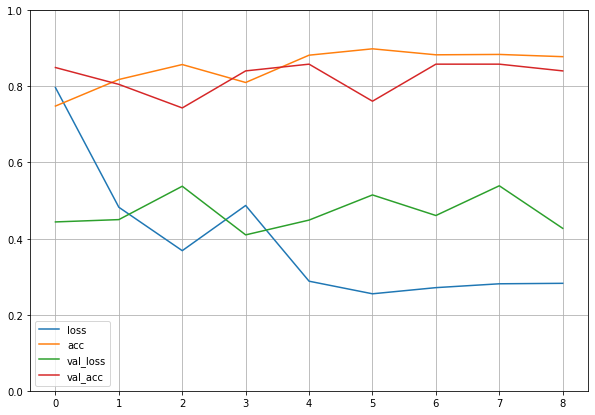

In [0]:
processing.train_classifier(extractor,binary_classifier(),processing.vgg_transfer,processing.axial,processing.acl);

In [0]:
processing.test_classifier(extractor,processing.load_model(processing.vgg_transfer,processing.axial,processing.acl,processing.classifier),processing.axial,processing.acl);

4/4 [==============================] - 0s 2ms/step - loss: 0.9847 - acc: 0.5833


## **Axial-meniscal**

Epoch 1/50
35/51 [===================>..........] - ETA: 0s - loss: 1.2039 - acc: 0.5943
Epoch 00001: val_acc improved from -inf to 0.75221, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Classifier/axial_meniscus.h5
51/51 [==============================] - 1s 17ms/step - loss: 1.0341 - acc: 0.6264 - val_loss: 0.6233 - val_acc: 0.7522
Epoch 2/50
40/51 [======================>.......] - ETA: 0s - loss: 0.5712 - acc: 0.7250
Epoch 00002: val_acc improved from 0.75221 to 0.79646, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Classifier/axial_meniscus.h5
51/51 [==============================] - 0s 8ms/step - loss: 0.5907 - acc: 0.7178 - val_loss: 0.5811 - val_acc: 0.7965
Epoch 3/50
43/51 [========================>.....] - ETA: 0s - loss: 0.5049 - acc: 0.7558
Epoch 00003: val_acc did not improve from 0.79646
51/51 [==============================] - 0s 3ms/step - loss: 0.5102 - acc: 0.7552 - val_loss: 0.6482 - val_acc: 0.6991
Epoch 4/50
44/51 [

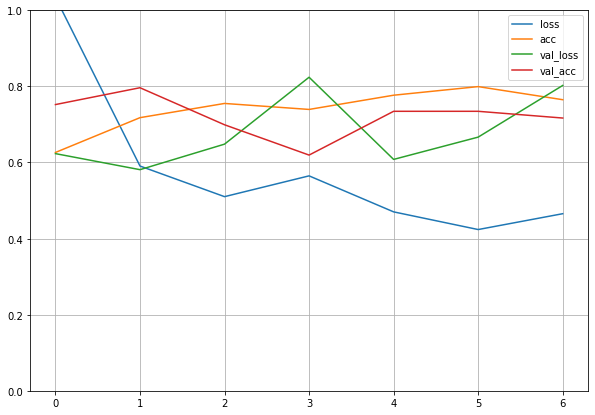

In [0]:
processing.train_classifier(extractor,binary_classifier(),processing.vgg_transfer,processing.axial,processing.meniscal);

In [0]:
processing.test_classifier(extractor,processing.load_model(processing.vgg_transfer,processing.axial,processing.meniscal,processing.classifier),processing.axial,processing.meniscal);

4/4 [==============================] - 0s 3ms/step - loss: 0.6761 - acc: 0.6417


## **sagittal-abnormal**

Epoch 1/50
40/51 [======================>.......] - ETA: 0s - loss: 0.9712 - acc: 0.7450
Epoch 00001: val_acc improved from -inf to 0.78761, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Classifier/sagittal_abnormal.h5
51/51 [==============================] - 0s 7ms/step - loss: 0.8435 - acc: 0.7611 - val_loss: 0.4062 - val_acc: 0.7876
Epoch 2/50
42/51 [=======================>......] - ETA: 0s - loss: 0.3272 - acc: 0.8560
Epoch 00002: val_acc improved from 0.78761 to 0.79646, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Classifier/sagittal_abnormal.h5
51/51 [==============================] - 0s 8ms/step - loss: 0.3232 - acc: 0.8623 - val_loss: 0.3766 - val_acc: 0.7965
Epoch 3/50
45/51 [=========================>....] - ETA: 0s - loss: 0.2896 - acc: 0.8756
Epoch 00003: val_acc improved from 0.79646 to 0.81416, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Classifier/sagittal_abnormal.h5
51/51 [=================

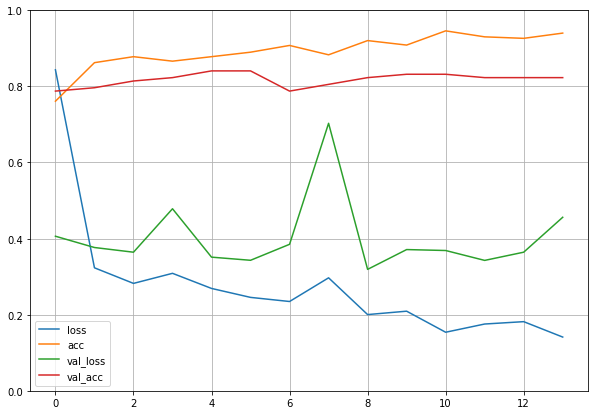

In [0]:
processing.train_classifier(extractor,binary_classifier(),processing.vgg_transfer,processing.sagittal,processing.abnormal);

In [0]:
processing.test_classifier(extractor,processing.load_model(processing.vgg_transfer,processing.sagittal,processing.abnormal,processing.classifier),processing.sagittal,processing.abnormal);

4/4 [==============================] - 0s 2ms/step - loss: 0.3391 - acc: 0.8583


## **sagittal-acl**

Epoch 1/50
44/51 [========================>.....] - ETA: 0s - loss: 0.6410 - acc: 0.7659
Epoch 00001: val_acc improved from -inf to 0.87611, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Classifier/sagittal_acl.h5
51/51 [==============================] - 1s 16ms/step - loss: 0.6137 - acc: 0.7748 - val_loss: 0.3539 - val_acc: 0.8761
Epoch 2/50
43/51 [========================>.....] - ETA: 0s - loss: 0.4998 - acc: 0.8047
Epoch 00002: val_acc did not improve from 0.87611
51/51 [==============================] - 0s 3ms/step - loss: 0.4941 - acc: 0.8083 - val_loss: 0.3708 - val_acc: 0.8584
Epoch 3/50
42/51 [=======================>......] - ETA: 0s - loss: 0.3883 - acc: 0.8333
Epoch 00003: val_acc did not improve from 0.87611
51/51 [==============================] - 0s 3ms/step - loss: 0.3932 - acc: 0.8319 - val_loss: 0.9069 - val_acc: 0.4867
Epoch 4/50
47/51 [==========================>...] - ETA: 0s - loss: 0.4439 - acc: 0.8170
Epoch 00004: val_acc did not improve

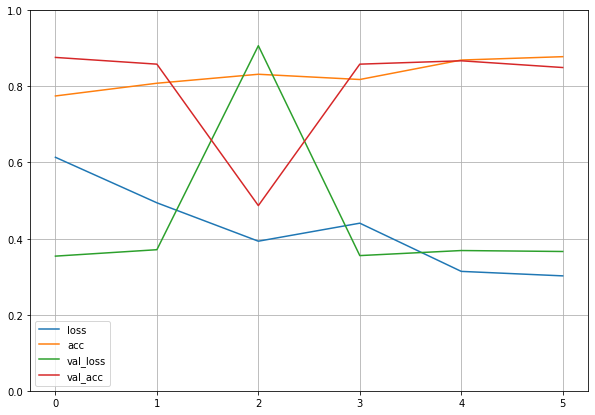

In [0]:
processing.train_classifier(extractor,binary_classifier(),processing.vgg_transfer,processing.sagittal,processing.acl);

In [0]:
processing.test_classifier(extractor,processing.load_model(processing.vgg_transfer,processing.sagittal,processing.acl,processing.classifier),processing.sagittal,processing.acl);

4/4 [==============================] - 0s 3ms/step - loss: 0.7135 - acc: 0.6250


## **sagittal-meniscal**

Epoch 1/50
41/51 [=======================>......] - ETA: 0s - loss: 0.9136 - acc: 0.6280
Epoch 00001: val_acc improved from -inf to 0.69027, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Classifier/sagittal_meniscus.h5
51/51 [==============================] - 1s 16ms/step - loss: 0.9199 - acc: 0.6185 - val_loss: 0.9187 - val_acc: 0.6903
Epoch 2/50
37/51 [====================>.........] - ETA: 0s - loss: 0.5959 - acc: 0.7108
Epoch 00002: val_acc improved from 0.69027 to 0.69912, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Classifier/sagittal_meniscus.h5
51/51 [==============================] - 0s 8ms/step - loss: 0.5780 - acc: 0.7158 - val_loss: 0.6250 - val_acc: 0.6991
Epoch 3/50
45/51 [=========================>....] - ETA: 0s - loss: 0.4911 - acc: 0.7522
Epoch 00003: val_acc did not improve from 0.69912
51/51 [==============================] - 0s 3ms/step - loss: 0.4847 - acc: 0.7542 - val_loss: 0.6059 - val_acc: 0.6903
Epoch 4/50
3

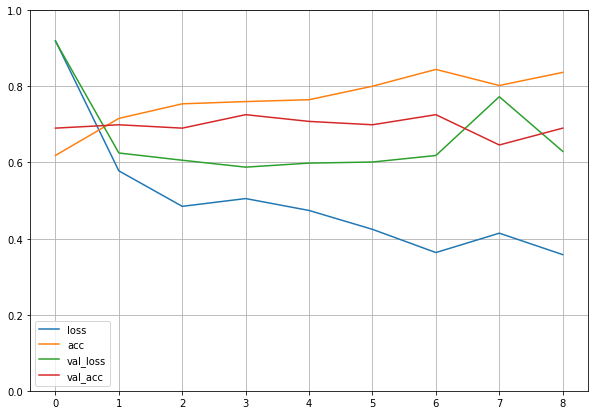

In [0]:
processing.train_classifier(extractor,binary_classifier(),processing.vgg_transfer,processing.sagittal,processing.meniscal);

In [0]:
processing.test_classifier(extractor,processing.load_model(processing.vgg_transfer,processing.sagittal,processing.meniscal,processing.classifier),processing.sagittal,processing.meniscal);

4/4 [==============================] - 0s 2ms/step - loss: 0.6818 - acc: 0.6500


## **coronal-abnormal**

Epoch 1/50
47/51 [==========================>...] - ETA: 0s - loss: 0.5961 - acc: 0.7979
Epoch 00001: val_acc improved from -inf to 0.84071, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Classifier/coronal_abnormal.h5
51/51 [==============================] - 3s 67ms/step - loss: 0.6056 - acc: 0.7945 - val_loss: 0.4165 - val_acc: 0.8407
Epoch 2/50
41/51 [=======================>......] - ETA: 0s - loss: 0.3763 - acc: 0.8378
Epoch 00002: val_acc improved from 0.84071 to 0.84956, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Classifier/coronal_abnormal.h5
51/51 [==============================] - 0s 8ms/step - loss: 0.3796 - acc: 0.8348 - val_loss: 0.4810 - val_acc: 0.8496
Epoch 3/50
40/51 [======================>.......] - ETA: 0s - loss: 0.4824 - acc: 0.8087
Epoch 00003: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 5ms/step - loss: 0.4503 - acc: 0.8171 - val_loss: 0.4227 - val_acc: 0.8496
Epoch 4/50
51/

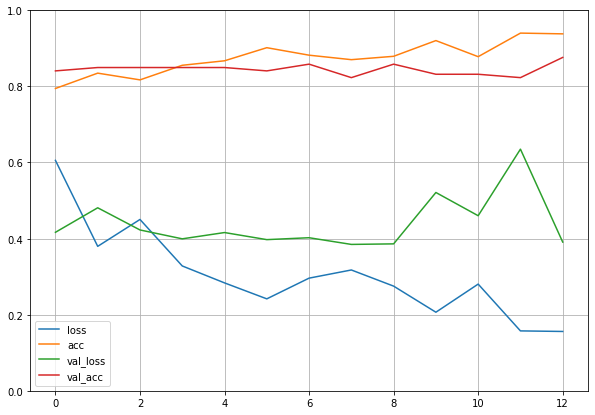

In [0]:
processing.train_classifier(extractor,binary_classifier(),processing.vgg_transfer,processing.coronal,processing.abnormal);

In [0]:
processing.test_classifier(extractor,processing.load_model(processing.vgg_transfer,processing.coronal,processing.abnormal,processing.classifier),processing.coronal,processing.abnormal);

4/4 [==============================] - 0s 3ms/step - loss: 0.6547 - acc: 0.7833


## **coronal-acl**

Epoch 1/50
48/51 [===========================>..] - ETA: 0s - loss: 0.8826 - acc: 0.7417
Epoch 00001: val_acc improved from -inf to 0.82301, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Classifier/coronal_acl.h5
51/51 [==============================] - 2s 32ms/step - loss: 0.8676 - acc: 0.7424 - val_loss: 0.4374 - val_acc: 0.8230
Epoch 2/50
49/51 [===========================>..] - ETA: 0s - loss: 0.4142 - acc: 0.8245
Epoch 00002: val_acc did not improve from 0.82301
51/51 [==============================] - 0s 5ms/step - loss: 0.4135 - acc: 0.8240 - val_loss: 0.3957 - val_acc: 0.8230
Epoch 3/50
49/51 [===========================>..] - ETA: 0s - loss: 0.3778 - acc: 0.8347
Epoch 00003: val_acc improved from 0.82301 to 0.84071, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Classifier/coronal_acl.h5
51/51 [==============================] - 0s 7ms/step - loss: 0.3820 - acc: 0.8319 - val_loss: 0.4580 - val_acc: 0.8407
Epoch 4/50
46/51 [======

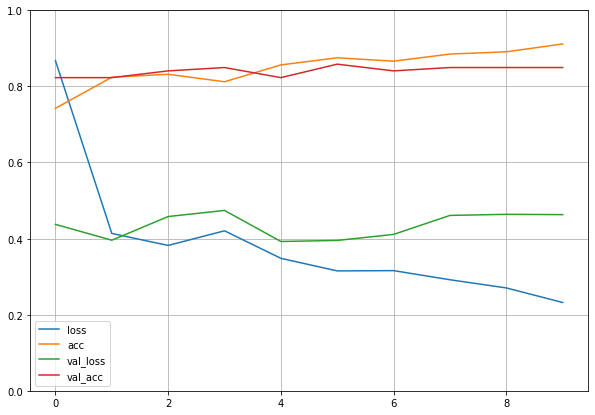

In [0]:
processing.train_classifier(extractor,binary_classifier(),processing.vgg_transfer,processing.coronal,processing.acl);

In [0]:
processing.test_classifier(extractor,processing.load_model(processing.vgg_transfer,processing.coronal,processing.acl,processing.classifier),processing.coronal,processing.acl);

4/4 [==============================] - 0s 4ms/step - loss: 1.0435 - acc: 0.5750


## **coronal-meniscal**

Epoch 1/50
40/51 [======================>.......] - ETA: 0s - loss: 1.2737 - acc: 0.5913
Epoch 00001: val_acc improved from -inf to 0.67257, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Classifier/coronal_meniscus.h5
51/51 [==============================] - 1s 25ms/step - loss: 1.2012 - acc: 0.5959 - val_loss: 0.9477 - val_acc: 0.6726
Epoch 2/50
42/51 [=======================>......] - ETA: 0s - loss: 0.6741 - acc: 0.6810
Epoch 00002: val_acc did not improve from 0.67257
51/51 [==============================] - 0s 5ms/step - loss: 0.6671 - acc: 0.6883 - val_loss: 0.6662 - val_acc: 0.6372
Epoch 3/50
46/51 [==========================>...] - ETA: 0s - loss: 0.5214 - acc: 0.7457
Epoch 00003: val_acc did not improve from 0.67257
51/51 [==============================] - 0s 4ms/step - loss: 0.5251 - acc: 0.7434 - val_loss: 0.8578 - val_acc: 0.5487
Epoch 4/50
46/51 [==========================>...] - ETA: 0s - loss: 0.5844 - acc: 0.7098
Epoch 00004: val_acc did not imp

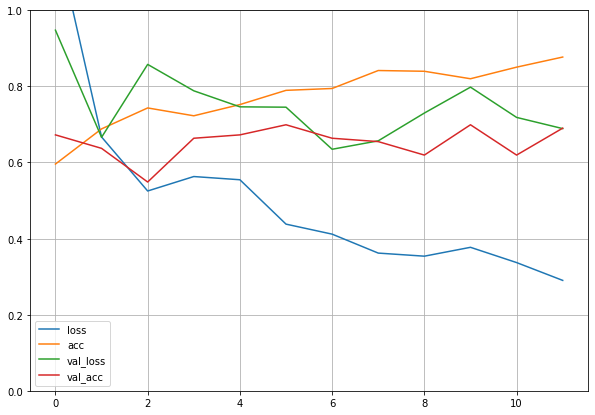

In [0]:
processing.train_classifier(extractor,binary_classifier(),processing.vgg_transfer,processing.coronal,processing.meniscal);

In [0]:
processing.test_classifier(extractor,processing.load_model(processing.vgg_transfer,processing.coronal,processing.meniscal,processing.classifier),processing.coronal,processing.meniscal);

4/4 [==============================] - 0s 5ms/step - loss: 0.8202 - acc: 0.6250


# **Adding dropout layers to decrease overfit**

In [0]:
# Over fit was apparent from previous results
def binary_classifier():  
  binary_class = keras.models.Sequential()
  binary_class.add(keras.layers.Dense(units=1024 , activation = 'relu' , input_dim = 512 ))
  binary_class.add(keras.layers.Dropout(0.5))
  binary_class.add(keras.layers.Dense(units=512 , activation = 'relu' ))
  binary_class.add(keras.layers.Dropout(0.5))
  binary_class.add(keras.layers.Dense(units=1 , activation = 'sigmoid'))
  binary_class.compile(loss='binary_crossentropy',optimizer = keras.optimizers.Adam(1e-4),metrics=['acc'])
  return binary_class

In [0]:
binary_classifier().summary();

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 513       
Total params: 1,050,625
Trainable params: 1,050,625
Non-trainable params: 0
_________________________________________________________________


## **Axial-abnormal**

Epoch 1/50
49/51 [===========================>..] - ETA: 0s - loss: 2.5773 - acc: 0.6990
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Classifier/axial_abnormal.h5
51/51 [==============================] - 2s 38ms/step - loss: 2.5489 - acc: 0.7060 - val_loss: 1.3917 - val_acc: 0.8053
Epoch 2/50
42/51 [=======================>......] - ETA: 0s - loss: 1.6736 - acc: 0.7286
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 5ms/step - loss: 1.5733 - acc: 0.7424 - val_loss: 0.7377 - val_acc: 0.8053
Epoch 3/50
41/51 [=======================>......] - ETA: 0s - loss: 1.1970 - acc: 0.7659
Epoch 00003: val_acc improved from 0.80531 to 0.84956, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Classifier/axial_abnormal.h5
51/51 [==============================] - 0s 7ms/step - loss: 1.1894 - acc: 0.7797 - val_loss: 0.5177 - val_acc: 0.8496
Epoch 4/50
41/51 [

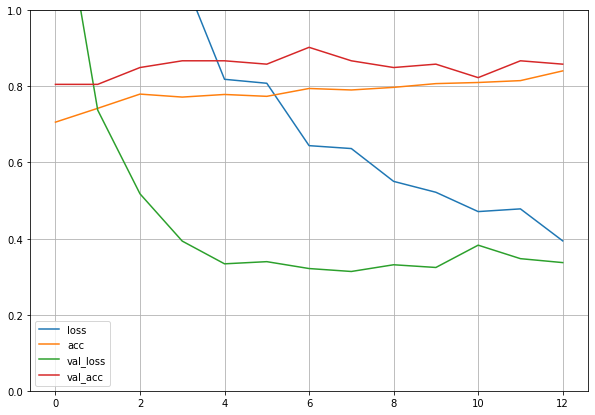

In [0]:
processing.train_classifier(extractor,binary_classifier(),processing.vgg_transfer,processing.axial,processing.abnormal);

In [0]:
processing.test_classifier(extractor,processing.load_model(processing.vgg_transfer,processing.axial,processing.abnormal,processing.classifier),processing.axial,processing.abnormal);

4/4 [==============================] - 0s 5ms/step - loss: 0.4120 - acc: 0.8333


## **Axial-acl**

Epoch 1/50
41/51 [=======================>......] - ETA: 0s - loss: 2.3953 - acc: 0.7037
Epoch 00001: val_acc improved from -inf to 0.84956, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Classifier/axial_acl.h5
51/51 [==============================] - 3s 50ms/step - loss: 2.3152 - acc: 0.7011 - val_loss: 0.8398 - val_acc: 0.8496
Epoch 2/50
39/51 [=====================>........] - ETA: 0s - loss: 1.5230 - acc: 0.7385
Epoch 00002: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 5ms/step - loss: 1.5079 - acc: 0.7335 - val_loss: 0.5862 - val_acc: 0.8407
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 1.2149 - acc: 0.7316
Epoch 00003: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 5ms/step - loss: 1.2149 - acc: 0.7316 - val_loss: 0.5568 - val_acc: 0.8496
Epoch 4/50
40/51 [======================>.......] - ETA: 0s - loss: 0.9725 - acc: 0.7500
Epoch 00004: val_acc did not improve fr

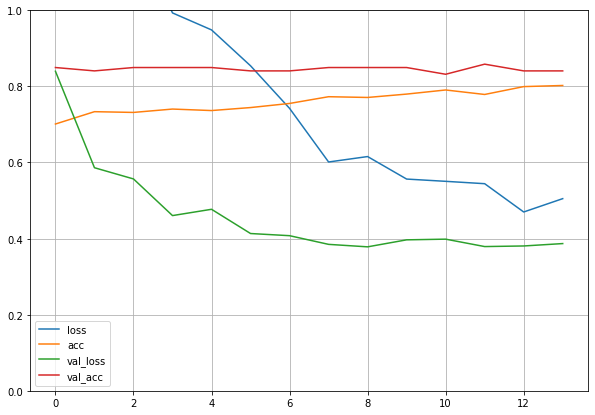

In [0]:
processing.train_classifier(extractor,binary_classifier(),processing.vgg_transfer,processing.axial,processing.acl);

In [0]:
processing.test_classifier(extractor,processing.load_model(processing.vgg_transfer,processing.axial,processing.acl,processing.classifier),processing.axial,processing.acl);

4/4 [==============================] - 0s 3ms/step - loss: 0.7643 - acc: 0.5833


## **Axial-meniscal**

Epoch 1/50
46/51 [==========================>...] - ETA: 0s - loss: 3.1686 - acc: 0.5728
Epoch 00001: val_acc improved from -inf to 0.70796, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Classifier/axial_meniscus.h5
51/51 [==============================] - 2s 36ms/step - loss: 3.1174 - acc: 0.5752 - val_loss: 0.9611 - val_acc: 0.7080
Epoch 2/50
42/51 [=======================>......] - ETA: 0s - loss: 2.1345 - acc: 0.5905
Epoch 00002: val_acc did not improve from 0.70796
51/51 [==============================] - 0s 5ms/step - loss: 2.0059 - acc: 0.6057 - val_loss: 0.6791 - val_acc: 0.7080
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 1.5830 - acc: 0.6057
Epoch 00003: val_acc improved from 0.70796 to 0.72566, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Classifier/axial_meniscus.h5
51/51 [==============================] - 0s 7ms/step - loss: 1.5830 - acc: 0.6057 - val_loss: 0.6313 - val_acc: 0.7257
Epoch 4/50
50/51 [

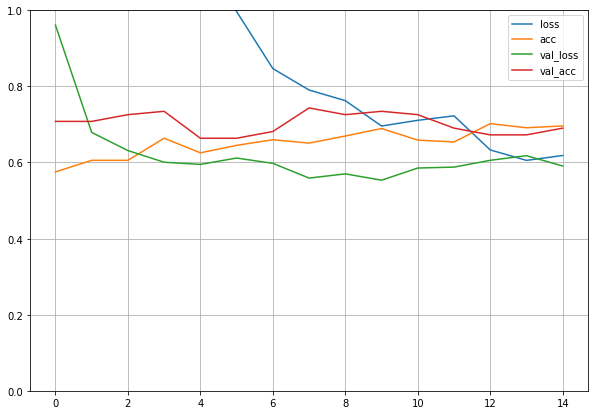

In [0]:
processing.train_classifier(extractor,binary_classifier(),processing.vgg_transfer,processing.axial,processing.meniscal);

In [0]:
processing.test_classifier(extractor,processing.load_model(processing.vgg_transfer,processing.axial,processing.meniscal,processing.classifier),processing.axial,processing.meniscal);

4/4 [==============================] - 0s 4ms/step - loss: 0.5780 - acc: 0.7000


## **sagittal-abnormal**

Epoch 1/50
42/51 [=======================>......] - ETA: 0s - loss: 2.0720 - acc: 0.6917
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Classifier/sagittal_abnormal.h5
51/51 [==============================] - 2s 38ms/step - loss: 2.0193 - acc: 0.7080 - val_loss: 0.8892 - val_acc: 0.8053
Epoch 2/50
41/51 [=======================>......] - ETA: 0s - loss: 1.2855 - acc: 0.7146
Epoch 00002: val_acc improved from 0.80531 to 0.83186, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Classifier/sagittal_abnormal.h5
51/51 [==============================] - 0s 9ms/step - loss: 1.2691 - acc: 0.7188 - val_loss: 0.5931 - val_acc: 0.8319
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.9672 - acc: 0.7502
Epoch 00003: val_acc did not improve from 0.83186
51/51 [==============================] - 0s 5ms/step - loss: 0.9672 - acc: 0.7502 - val_loss: 0.6107 - val_acc: 0.8230
Epoch 4/50
5

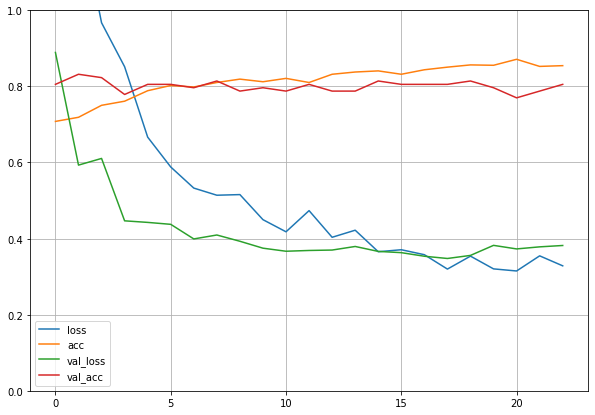

In [0]:
processing.train_classifier(extractor,binary_classifier(),processing.vgg_transfer,processing.sagittal,processing.abnormal);

In [0]:
processing.test_classifier(extractor,processing.load_model(processing.vgg_transfer,processing.sagittal,processing.abnormal,processing.classifier),processing.sagittal,processing.abnormal);

4/4 [==============================] - 0s 4ms/step - loss: 0.5437 - acc: 0.8250


## **sagittal-acl**

Epoch 1/50
43/51 [========================>.....] - ETA: 0s - loss: 2.1834 - acc: 0.7291
Epoch 00001: val_acc improved from -inf to 0.84071, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Classifier/sagittal_acl.h5
51/51 [==============================] - 2s 38ms/step - loss: 2.1091 - acc: 0.7257 - val_loss: 0.4253 - val_acc: 0.8407
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 1.5334 - acc: 0.7227
Epoch 00002: val_acc did not improve from 0.84071
51/51 [==============================] - 0s 5ms/step - loss: 1.5334 - acc: 0.7227 - val_loss: 0.3908 - val_acc: 0.8053
Epoch 3/50
40/51 [======================>.......] - ETA: 0s - loss: 1.0628 - acc: 0.7425
Epoch 00003: val_acc improved from 0.84071 to 0.84956, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Classifier/sagittal_acl.h5
51/51 [==============================] - 0s 7ms/step - loss: 1.0744 - acc: 0.7384 - val_loss: 0.3814 - val_acc: 0.8496
Epoch 4/50
50/51 [====

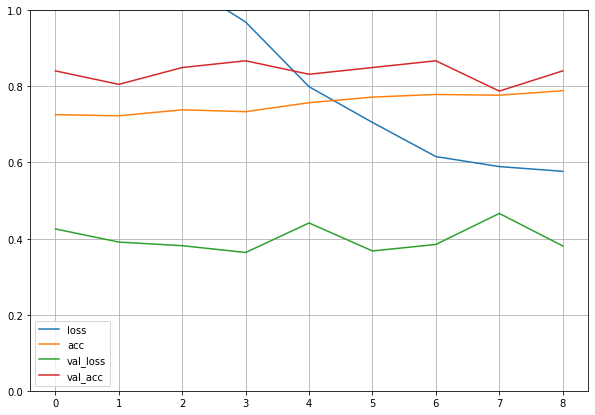

In [0]:
processing.train_classifier(extractor,binary_classifier(),processing.vgg_transfer,processing.sagittal,processing.acl);

In [0]:
processing.test_classifier(extractor,processing.load_model(processing.vgg_transfer,processing.sagittal,processing.acl,processing.classifier),processing.sagittal,processing.acl);

4/4 [==============================] - 0s 3ms/step - loss: 0.6449 - acc: 0.7167


## **sagittal-meniscal**

Epoch 1/50
42/51 [=======================>......] - ETA: 0s - loss: 2.8598 - acc: 0.5464
Epoch 00001: val_acc improved from -inf to 0.67257, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Classifier/sagittal_meniscus.h5
51/51 [==============================] - 2s 35ms/step - loss: 2.7597 - acc: 0.5536 - val_loss: 1.0405 - val_acc: 0.6726
Epoch 2/50
40/51 [======================>.......] - ETA: 0s - loss: 2.0396 - acc: 0.5775
Epoch 00002: val_acc improved from 0.67257 to 0.73451, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Classifier/sagittal_meniscus.h5
51/51 [==============================] - 0s 8ms/step - loss: 1.9854 - acc: 0.5713 - val_loss: 0.6393 - val_acc: 0.7345
Epoch 3/50
44/51 [========================>.....] - ETA: 0s - loss: 1.3260 - acc: 0.6409
Epoch 00003: val_acc did not improve from 0.73451
51/51 [==============================] - 0s 6ms/step - loss: 1.3244 - acc: 0.6421 - val_loss: 0.5858 - val_acc: 0.7257
Epoch 4/50
4

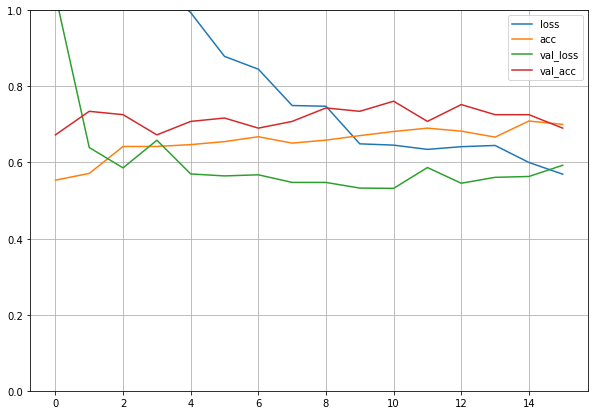

In [0]:
processing.train_classifier(extractor,binary_classifier(),processing.vgg_transfer,processing.sagittal,processing.meniscal);

In [0]:
processing.test_classifier(extractor,processing.load_model(processing.vgg_transfer,processing.sagittal,processing.meniscal,processing.classifier),processing.sagittal,processing.meniscal);

4/4 [==============================] - 0s 5ms/step - loss: 0.6180 - acc: 0.6083


## **coronal-abnormal**

Epoch 1/50
46/51 [==========================>...] - ETA: 0s - loss: 1.8409 - acc: 0.7207
Epoch 00001: val_acc improved from -inf to 0.79646, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Classifier/coronal_abnormal.h5
51/51 [==============================] - 7s 132ms/step - loss: 1.8141 - acc: 0.7217 - val_loss: 0.4817 - val_acc: 0.7965
Epoch 2/50
48/51 [===========================>..] - ETA: 0s - loss: 1.3768 - acc: 0.7344
Epoch 00002: val_acc improved from 0.79646 to 0.84071, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Classifier/coronal_abnormal.h5
51/51 [==============================] - 0s 8ms/step - loss: 1.3862 - acc: 0.7345 - val_loss: 0.5902 - val_acc: 0.8407
Epoch 3/50
40/51 [======================>.......] - ETA: 0s - loss: 1.0207 - acc: 0.7625
Epoch 00003: val_acc did not improve from 0.84071
51/51 [==============================] - 0s 5ms/step - loss: 1.0126 - acc: 0.7601 - val_loss: 0.4347 - val_acc: 0.8319
Epoch 4/50
43

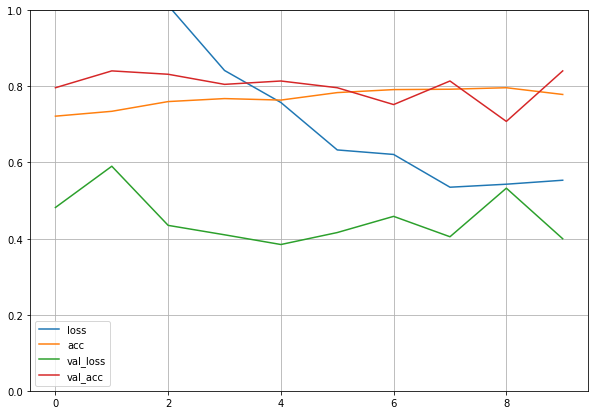

In [0]:
processing.train_classifier(extractor,binary_classifier(),processing.vgg_transfer,processing.coronal,processing.abnormal);

In [0]:
processing.test_classifier(extractor,processing.load_model(processing.vgg_transfer,processing.coronal,processing.abnormal,processing.classifier),processing.coronal,processing.abnormal);

4/4 [==============================] - 0s 4ms/step - loss: 0.8277 - acc: 0.8000


## **coronal-acl**

Epoch 1/50
49/51 [===========================>..] - ETA: 0s - loss: 2.0402 - acc: 0.7051
Epoch 00001: val_acc improved from -inf to 0.84956, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Classifier/coronal_acl.h5
51/51 [==============================] - 4s 70ms/step - loss: 2.0400 - acc: 0.7050 - val_loss: 1.1385 - val_acc: 0.8496
Epoch 2/50
42/51 [=======================>......] - ETA: 0s - loss: 1.4412 - acc: 0.6952
Epoch 00002: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 5ms/step - loss: 1.4144 - acc: 0.7011 - val_loss: 0.6873 - val_acc: 0.8496
Epoch 3/50
49/51 [===========================>..] - ETA: 0s - loss: 1.0913 - acc: 0.7347
Epoch 00003: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 5ms/step - loss: 1.0843 - acc: 0.7306 - val_loss: 0.6180 - val_acc: 0.8496
Epoch 4/50
50/51 [============================>.] - ETA: 0s - loss: 0.9275 - acc: 0.7470
Epoch 00004: val_acc did not improve 

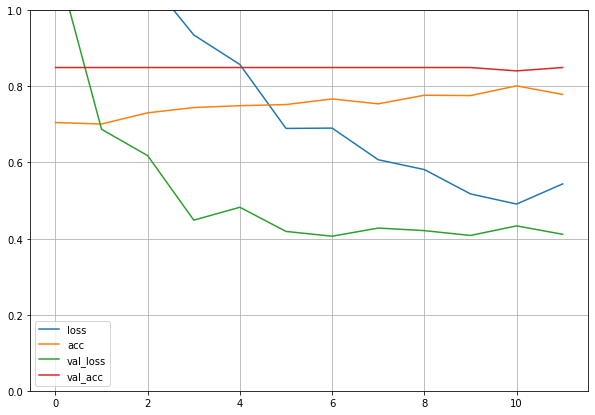

In [0]:
processing.train_classifier(extractor,binary_classifier(),processing.vgg_transfer,processing.coronal,processing.acl);

In [0]:
processing.test_classifier(extractor,processing.load_model(processing.vgg_transfer,processing.coronal,processing.acl,processing.classifier),processing.coronal,processing.acl);

4/4 [==============================] - 0s 3ms/step - loss: 3.3794 - acc: 0.5500


## **coronal-meniscal**

Epoch 1/50
43/51 [========================>.....] - ETA: 0s - loss: 2.6808 - acc: 0.5419
Epoch 00001: val_acc improved from -inf to 0.66372, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Classifier/coronal_meniscus.h5
51/51 [==============================] - 4s 70ms/step - loss: 2.5980 - acc: 0.5477 - val_loss: 0.8819 - val_acc: 0.6637
Epoch 2/50
48/51 [===========================>..] - ETA: 0s - loss: 1.5539 - acc: 0.6010
Epoch 00002: val_acc did not improve from 0.66372
51/51 [==============================] - 0s 5ms/step - loss: 1.5608 - acc: 0.5998 - val_loss: 0.7148 - val_acc: 0.6018
Epoch 3/50
49/51 [===========================>..] - ETA: 0s - loss: 1.2543 - acc: 0.6010
Epoch 00003: val_acc improved from 0.66372 to 0.68142, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Classifier/coronal_meniscus.h5
51/51 [==============================] - 0s 7ms/step - loss: 1.2523 - acc: 0.6008 - val_loss: 0.6020 - val_acc: 0.6814
Epoch 4/50
50/

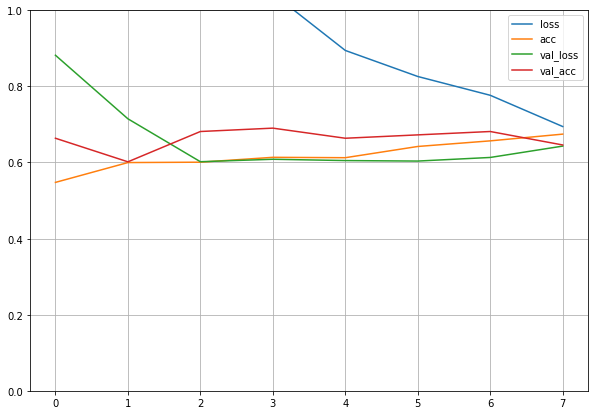

In [0]:
processing.train_classifier(extractor,binary_classifier(),processing.vgg_transfer,processing.coronal,processing.meniscal);

In [0]:
processing.test_classifier(extractor,processing.load_model(processing.vgg_transfer,processing.coronal,processing.meniscal,processing.classifier),processing.coronal,processing.meniscal);

4/4 [==============================] - 0s 3ms/step - loss: 0.6048 - acc: 0.6333


# **Creating the logistic regressor model**

In [0]:
def logistic_regressor():
  log_reg = keras.models.Sequential()
  log_reg.add(keras.layers.Dense(1 , activation = 'sigmoid' , input_dim = 3))
  log_reg.compile(loss='binary_crossentropy',optimizer = 'adam',metrics=['acc'])
  return log_reg

In [0]:
logistic_regressor().summary();

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


# **Training the logistic regressors**

## **Abnormal**

Epoch 1/50
43/51 [========================>.....] - ETA: 0s - loss: 0.8038 - acc: 0.1907
Epoch 00001: val_acc improved from -inf to 0.17699, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Regressor/abnormal.h5
51/51 [==============================] - 0s 7ms/step - loss: 0.8007 - acc: 0.1927 - val_loss: 0.7638 - val_acc: 0.1770
Epoch 2/50
45/51 [=========================>....] - ETA: 0s - loss: 0.7353 - acc: 0.2578
Epoch 00002: val_acc improved from 0.17699 to 0.59292, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Regressor/abnormal.h5
51/51 [==============================] - 0s 4ms/step - loss: 0.7288 - acc: 0.2989 - val_loss: 0.6983 - val_acc: 0.5929
Epoch 3/50
49/51 [===========================>..] - ETA: 0s - loss: 0.6684 - acc: 0.7112
Epoch 00003: val_acc improved from 0.59292 to 0.76106, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Regressor/abnormal.h5
51/51 [==============================] - 0s 3ms/step -

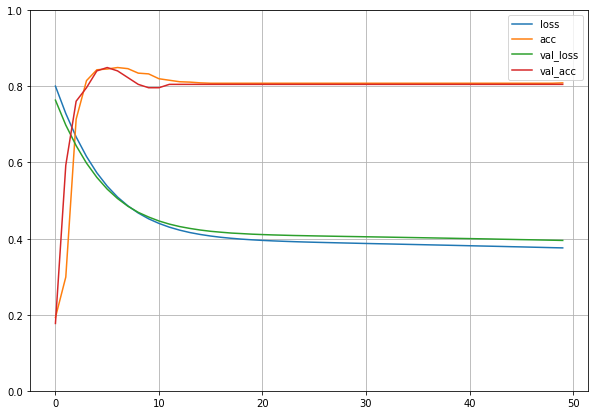

In [0]:
processing.train_regressor(logistic_regressor(),extractor,extractor,extractor,processing.vgg_transfer,processing.abnormal);

In [0]:
processing.test_regressor(extractor,extractor,extractor,processing.vgg_transfer,processing.abnormal);

4/4 [==============================] - 0s 3ms/step - loss: 0.5338 - acc: 0.8083


## **ACL**

Epoch 1/50
46/51 [==========================>...] - ETA: 0s - loss: 0.7250 - acc: 0.1957
Epoch 00001: val_acc improved from -inf to 0.20354, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Regressor/acl.h5
51/51 [==============================] - 0s 6ms/step - loss: 0.7241 - acc: 0.1976 - val_loss: 0.7387 - val_acc: 0.2035
Epoch 2/50
42/51 [=======================>......] - ETA: 0s - loss: 0.7054 - acc: 0.3405
Epoch 00002: val_acc improved from 0.20354 to 0.46018, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Regressor/acl.h5
51/51 [==============================] - 0s 3ms/step - loss: 0.7044 - acc: 0.3628 - val_loss: 0.7166 - val_acc: 0.4602
Epoch 3/50
49/51 [===========================>..] - ETA: 0s - loss: 0.6861 - acc: 0.5857
Epoch 00003: val_acc improved from 0.46018 to 0.61062, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Regressor/acl.h5
51/51 [==============================] - 0s 3ms/step - loss: 0.6861 -

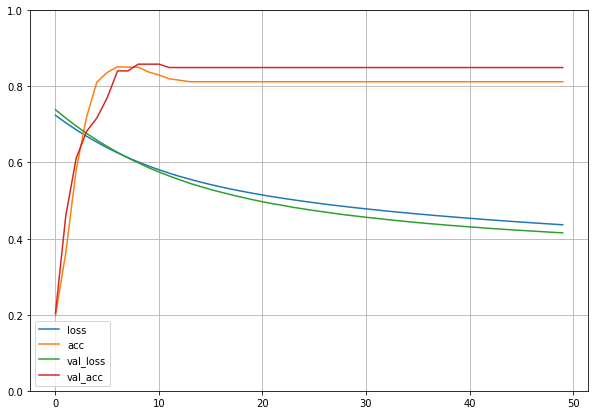

In [0]:
processing.train_regressor(logistic_regressor(),extractor,extractor,extractor,processing.vgg_transfer,processing.acl);

In [0]:
processing.test_regressor(extractor,extractor,extractor,processing.vgg_transfer,processing.acl);

4/4 [==============================] - 0s 2ms/step - loss: 0.6529 - acc: 0.6250


## **Meniscal**

Epoch 1/50
39/51 [=====================>........] - ETA: 0s - loss: 0.7064 - acc: 0.4846
Epoch 00001: val_acc improved from -inf to 0.55752, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Regressor/meniscus.h5
51/51 [==============================] - 0s 6ms/step - loss: 0.7043 - acc: 0.5084 - val_loss: 0.6866 - val_acc: 0.5575
Epoch 2/50
45/51 [=========================>....] - ETA: 0s - loss: 0.7005 - acc: 0.5522
Epoch 00002: val_acc improved from 0.55752 to 0.59292, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Regressor/meniscus.h5
51/51 [==============================] - 0s 3ms/step - loss: 0.6999 - acc: 0.5556 - val_loss: 0.6820 - val_acc: 0.5929
Epoch 3/50
44/51 [========================>.....] - ETA: 0s - loss: 0.6984 - acc: 0.5784
Epoch 00003: val_acc improved from 0.59292 to 0.61947, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Regressor/meniscus.h5
51/51 [==============================] - 0s 3ms/step -

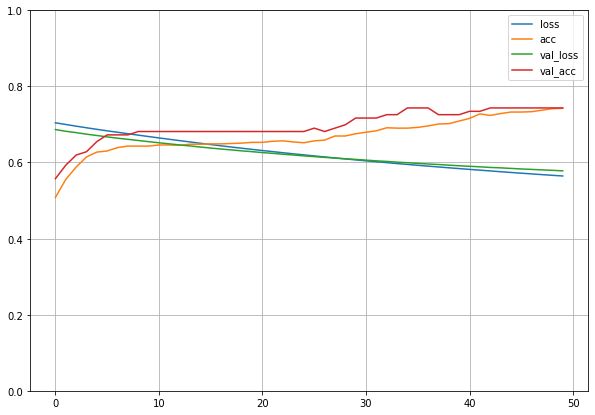

In [0]:
processing.train_regressor(logistic_regressor(),extractor,extractor,extractor,processing.vgg_transfer,processing.meniscal);

In [0]:
processing.test_regressor(extractor,extractor,extractor,processing.vgg_transfer,processing.meniscal);

4/4 [==============================] - 0s 2ms/step - loss: 0.6374 - acc: 0.5917
